In [155]:
import pandas as pd
import numpy as np

# Agar hasil acakannya sama terus
np.random.seed(42)

# --- 1. MEMBUAT DATAFRAME UTAMA (df_kotor) ---
n_data = 1000

# Generate data random
data = {
    'Umur': np.random.randint(18, 65, n_data),
    'BMI': np.random.normal(30, 5, n_data),
    'Anak': np.random.randint(0, 5, n_data),
    'Perokok': np.random.choice(['yes', 'no'], n_data),
    'Wilayah': np.random.choice(['southwest', 'southeast', 'northwest', 'northeast'], n_data),
}
df_kotor = pd.DataFrame(data)

# Buat kolom Tagihan (Target) berdasarkan rumus rahasia
biaya_rokok = np.where(df_kotor['Perokok'] == 'yes', 20000, 0)
df_kotor['Tagihan'] = 2000 + (df_kotor['Umur'] * 250) + (df_kotor['BMI'] * 300) + (df_kotor['Anak'] * 500) + biaya_rokok

# --- 2. FASE MENGOTORI DATA (Supaya kamu bisa bersih-bersih) ---

# A. Bikin DUPLIKAT (Copy 50 baris pertama ke paling bawah)
df_kotor = pd.concat([df_kotor, df_kotor.iloc[:50]], ignore_index=True)

# B. Bikin MISSING VALUE (Bolongin data BMI dan Anak)
idx_nan = np.random.choice(df_kotor.index, 20)
df_kotor.loc[idx_nan, 'BMI'] = np.nan  # BMI jadi NaN
df_kotor.loc[np.random.choice(df_kotor.index, 20), 'Anak'] = np.nan # Anak jadi NaN

# C. Bikin TYPO (Kolom Perokok jadi berantakan: 'yes', 'Yes', 'YES')
idx_yes = df_kotor[df_kotor['Perokok'] == 'yes'].index
idx_typo = np.random.choice(idx_yes, 30, replace=False)
df_kotor.loc[idx_typo[:15], 'Perokok'] = 'Yes' # Typo 1
df_kotor.loc[idx_typo[15:], 'Perokok'] = 'YES' # Typo 2

# D. Bikin OUTLIER EKSTRIM (Umur gak masuk akal)
df_kotor.loc[0, 'Umur'] = 500  # Manusia abadi
df_kotor.loc[1, 'Umur'] = -5   # Belum lahir

df_kotor

,Umur,BMI,Anak,Perokok,Wilayah,Tagihan
0,500,35.031464,1.0,no,northwest,27009.439214
1,-5,27.115541,4.0,yes,northwest,43634.662196
2,32,34.178461,3.0,no,southwest,21753.538168
3,60,24.351466,1.0,yes,southwest,44805.439718
4,25,32.649021,NaN,no,northwest,19544.706267
...,...,...,...,...,...,...
1045,31,41.353464,3.0,no,northeast,23656.039287
1046,26,30.909331,4.0,no,southeast,19772.799383
1047,43,31.241103,1.0,no,northeast,22622.330879
1048,19,NaN,1.0,yes,northeast,35560.958651


In [156]:
df_kotor = df_kotor.drop_duplicates()  

In [157]:
df_kotor.isnull().sum()

Umur        0
BMI        20
Anak       20
Perokok     0
Wilayah     0
Tagihan     0
dtype: int64

In [158]:
df_kotor['Anak'] = pd.to_numeric(df_kotor['Anak'], errors='coerce')

/tmp/ipykernel_40018/1054790296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kotor['Anak'] = pd.to_numeric(df_kotor['Anak'], errors='coerce')


In [159]:
df_kotor['BMI'] = df_kotor['BMI'].fillna(df_kotor['BMI'].median())
df_kotor['Anak'] = df_kotor['Anak'].fillna(df_kotor['Anak'].median())

/tmp/ipykernel_40018/2410251914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kotor['BMI'] = df_kotor['BMI'].fillna(df_kotor['BMI'].median())
/tmp/ipykernel_40018/2410251914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kotor['Anak'] = df_kotor['Anak'].fillna(df_kotor['Anak'].median())


In [160]:
df_kotor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 1048
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Umur     1007 non-null   int64  
 1   BMI      1007 non-null   float64
 2   Anak     1007 non-null   float64
 3   Perokok  1007 non-null   object 
 4   Wilayah  1007 non-null   object 
 5   Tagihan  1007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 55.1+ KB


In [161]:
df_kotor.sample(30)

,Umur,BMI,Anak,Perokok,Wilayah,Tagihan
745,20,34.783512,4.0,yes,northeast,39435.053475
54,25,32.394899,1.0,yes,northeast,38468.469739
836,46,37.355852,2.0,no,southwest,25706.755491
533,53,32.385204,0.0,no,northeast,24965.561241
571,45,39.570157,3.0,no,southeast,26621.047031
144,59,27.377399,4.0,yes,southwest,46963.219601
352,20,34.102411,0.0,yes,southwest,37230.723272
817,30,17.044789,0.0,no,northeast,14613.436562
141,32,36.357775,0.0,no,northwest,20907.332642
201,19,35.071850,0.0,no,southwest,17271.555098


In [162]:
numeric = df_kotor.select_dtypes(include=['number']).columns
numeric

Index(['Umur', 'BMI', 'Anak', 'Tagihan'], dtype='object')

/tmp/ipykernel_40018/4147823197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_kotor[col], palette='viridis')
/tmp/ipykernel_40018/4147823197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_kotor[col], palette='viridis')
/tmp/ipykernel_40018/4147823197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_kotor[col], palette='viridis')
/tmp/ipykernel_40018/4147823197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

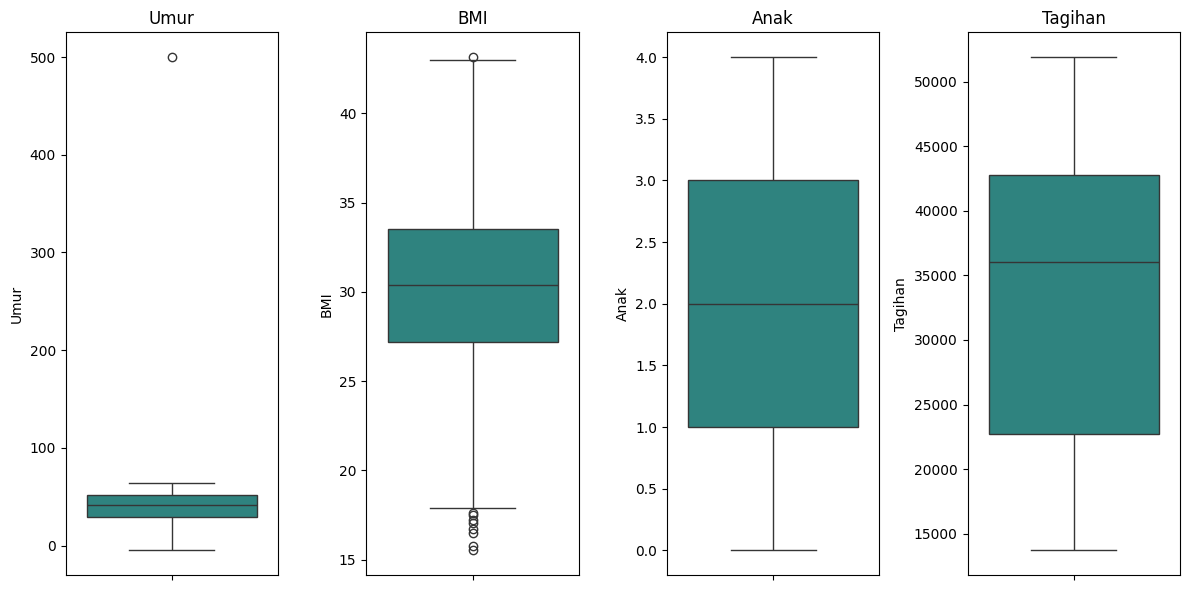

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric):
    plt.subplot(1, len(numeric), i + 1)
    sns.boxplot(df_kotor[col], palette='viridis')
    plt.title(col)
plt.tight_layout()
plt.show()


In [202]:
q1 = df_kotor[numeric].quantile(0.25)
q3 = df_kotor[numeric].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
nonOutlier = ~((df_kotor[numeric] < lower) | (df_kotor[numeric] > upper)).any(axis=1)
df_filtered_numeric = df_kotor.loc[nonOutlier, numeric]
df_filtered_numeric


,Umur,BMI,Anak,Tagihan
1,-5,27.115541,4.0,43634.662196
2,32,34.178461,3.0,21753.538168
3,60,24.351466,1.0,44805.439718
4,25,32.649021,2.0,19544.706267
5,38,37.207843,1.0,43162.352931
...,...,...,...,...
1004,25,32.649021,3.0,19544.706267
1008,40,30.409147,0.0,21865.608191
1020,47,31.972261,1.0,43841.678214
1029,44,24.959568,0.0,40487.870534


<Axes: >

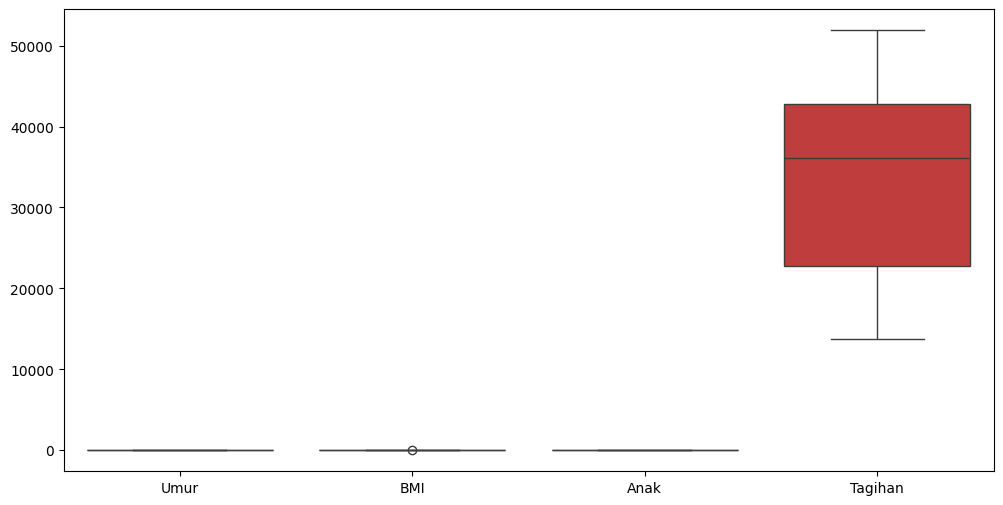

In [203]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered_numeric)

In [168]:
df_kotor

,Umur,BMI,Anak,Perokok,Wilayah,Tagihan
0,500,35.031464,1.0,no,northwest,27009.439214
1,-5,27.115541,4.0,yes,northwest,43634.662196
2,32,34.178461,3.0,no,southwest,21753.538168
3,60,24.351466,1.0,yes,southwest,44805.439718
4,25,32.649021,2.0,no,northwest,19544.706267
...,...,...,...,...,...,...
1004,25,32.649021,3.0,no,northwest,19544.706267
1008,40,30.409147,0.0,no,northeast,21865.608191
1020,47,31.972261,1.0,yes,southwest,43841.678214
1029,44,24.959568,0.0,yes,northwest,40487.870534


In [170]:
df_bersih  = df_kotor.loc[nonOutlier].copy
df_kotor


,Umur,BMI,Anak,Perokok,Wilayah,Tagihan
0,500,35.031464,1.0,no,northwest,27009.439214
1,-5,27.115541,4.0,yes,northwest,43634.662196
2,32,34.178461,3.0,no,southwest,21753.538168
3,60,24.351466,1.0,yes,southwest,44805.439718
4,25,32.649021,2.0,no,northwest,19544.706267
...,...,...,...,...,...,...
1004,25,32.649021,3.0,no,northwest,19544.706267
1008,40,30.409147,0.0,no,northeast,21865.608191
1020,47,31.972261,1.0,yes,southwest,43841.678214
1029,44,24.959568,0.0,yes,northwest,40487.870534


In [174]:
df_bersih = df_kotor[df_kotor['Umur'] > 0].copy()
df_bersih

,Umur,BMI,Anak,Perokok,Wilayah,Tagihan
0,500,35.031464,1.0,no,northwest,27009.439214
2,32,34.178461,3.0,no,southwest,21753.538168
3,60,24.351466,1.0,yes,southwest,44805.439718
4,25,32.649021,2.0,no,northwest,19544.706267
5,38,37.207843,1.0,yes,northeast,43162.352931
...,...,...,...,...,...,...
1004,25,32.649021,3.0,no,northwest,19544.706267
1008,40,30.409147,0.0,no,northeast,21865.608191
1020,47,31.972261,1.0,yes,southwest,43841.678214
1029,44,24.959568,0.0,yes,northwest,40487.870534


In [184]:
df_bersih['Perokok'] = df_bersih['Perokok'].str.capitalize()
df_bersih['Wilayah'] = df_bersih['Wilayah'].str.capitalize() 

df_bersih.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1048
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Umur     1006 non-null   int64  
 1   BMI      1006 non-null   float64
 2   Anak     1006 non-null   float64
 3   Perokok  1006 non-null   object 
 4   Wilayah  1006 non-null   object 
 5   Tagihan  1006 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 55.0+ KB


In [188]:
df_filtered_numeric

,Umur,BMI,Anak,Tagihan
1,-5,27.115541,4.0,43634.662196
2,32,34.178461,3.0,21753.538168
3,60,24.351466,1.0,44805.439718
4,25,32.649021,2.0,19544.706267
5,38,37.207843,1.0,43162.352931
...,...,...,...,...
1004,25,32.649021,3.0,19544.706267
1008,40,30.409147,0.0,21865.608191
1020,47,31.972261,1.0,43841.678214
1029,44,24.959568,0.0,40487.870534


In [ ]:
categorical = df_kotor.select_dtypes(include=['object']).columns
for i in categorical:
    df_kotor[i] = df_kotor[i].str.capitalize()


/tmp/ipykernel_40018/3632233502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kotor[i] = df_kotor[i].str.capitalize()


23.0

In [198]:
one_hot = pd.get_dummies(df_kotor, columns=categorical)
one_hot

,Umur,BMI,Anak,Tagihan,Perokok_No,Perokok_Yes,Wilayah_Northeast,Wilayah_Northwest,Wilayah_Southeast,Wilayah_Southwest
0,500,35.031464,1.0,27009.439214,True,False,False,True,False,False
1,-5,27.115541,4.0,43634.662196,False,True,False,True,False,False
2,32,34.178461,3.0,21753.538168,True,False,False,False,False,True
3,60,24.351466,1.0,44805.439718,False,True,False,False,False,True
4,25,32.649021,2.0,19544.706267,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1004,25,32.649021,3.0,19544.706267,True,False,False,True,False,False
1008,40,30.409147,0.0,21865.608191,True,False,True,False,False,False
1020,47,31.972261,1.0,43841.678214,False,True,False,False,False,True
1029,44,24.959568,0.0,40487.870534,False,True,False,True,False,False


In [211]:
one_hot = one_hot[one_hot['Umur'].between(0, 100)]
df = one_hot

Data Splitting

In [213]:
from sklearn.model_selection import train_test_split
#ambil seluruh kolom feature kecuali kolom target 'Tagihan
x = df.drop(columns=['Tagihan'])
#ambil kolom target
y = df['Tagihan']

df

,Umur,BMI,Anak,Tagihan,Perokok_No,Perokok_Yes,Wilayah_Northeast,Wilayah_Northwest,Wilayah_Southeast,Wilayah_Southwest
2,32,34.178461,3.0,21753.538168,True,False,False,False,False,True
3,60,24.351466,1.0,44805.439718,False,True,False,False,False,True
4,25,32.649021,2.0,19544.706267,True,False,False,True,False,False
5,38,37.207843,1.0,43162.352931,False,True,True,False,False,False
6,56,17.641777,2.0,22292.533250,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1004,25,32.649021,3.0,19544.706267,True,False,False,True,False,False
1008,40,30.409147,0.0,21865.608191,True,False,True,False,False,False
1020,47,31.972261,1.0,43841.678214,False,True,False,False,False,True
1029,44,24.959568,0.0,40487.870534,False,True,False,True,False,False


In [ ]:
#bagi data menjadi data latih dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


201

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

model_lr = LinearRegression()
model_gbr = GradientBoostingRegressor()

#melatih model
model_lr.fit(x_train, y_train)
model_gbr.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [250]:
from sklearn.metrics import mean_absolute_error, r2_score
#suruh mereka memprediksi data test
pred_lr = model_lr.predict(x_test)
pred_gbr = model_gbr.predict(x_test)

#nilai hasilnya / evaluasi
r2_lr = r2_score(y_test, pred_lr)
mae_lr = mean_absolute_error(y_test, pred_lr)
print(f'Akurasi Linear Regression (R2) : {r2_lr:.4f}')

#hasil gradient boosting
r2_gbr = r2_score(y_test, pred_gbr)
mae_gbr = mean_absolute_error(y_test, pred_gbr)
print(f"Akurasi Gradient Boosting Regressor (R2) :  {r2_gbr:.4f}")

Akurasi Linear Regression (R2) : 0.9989
Akurasi Gradient Boosting Regressor (R2) :  0.9980


In [240]:
import pandas as pd

# Kita cek dulu nama kolom aslinya biar gak salah lagi

# Revisi Data Pak Budi (Sesuaikan Besar/Kecil Hurufnya)
data_pak_budi = pd.DataFrame({
    'Umur': [30],
    'BMI': [25],
    'Anak': [2],
    # Perhatikan huruf besar/kecilnya sekarang disesuaikan dengan X_train
    'Perokok_No': [0],          # 0 = Bukan Non-Perokok (alias Perokok)
    'Perokok_Yes': [1],         # 1 = YA Perokok
    'Wilayah_Northeast': [0],
    'Wilayah_Northwest': [0],
    'Wilayah_Southeast': [0],
    'Wilayah_Southwest': [1]    # Tinggal di Southwest
})

# Coba Prediksi Ulang
tebakan = model_lr.predict(data_pak_budi)

print(f"\nPrediksi Tagihan Pak Budi: Rp {tebakan[0]:,.0f}")


Prediksi Tagihan Pak Budi: Rp 37,977
